# Workflow & Hyperparameter Optimization

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [3]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [6]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [8]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [9]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [10]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=1)
average_score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
average_score

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {'n_neighbors': [1, 5, 10, 20, 50]}

# Instantiate Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [13]:
# YOUR CODE HERE
best_params = grid_search.best_params_
optimal_k = best_params['n_neighbors']
optimal_k


10

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [15]:
# YOUR CODE HERE
best_score = grid_search.best_score_
best_score

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [18]:
# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {'n_neighbors': [6, 7, 8, 9, 11,12,13,14,15,16,17,18,19]}

# Instantiate Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
grid_search.fit(X_train_scaled, y_train)

best_score = grid_search.best_score_
best_k = grid_search.best_params_['n_neighbors']
best_k,best_score



(16, 0.7666311417513013)

***🧪 Test your code***

In [19]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-workflow/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

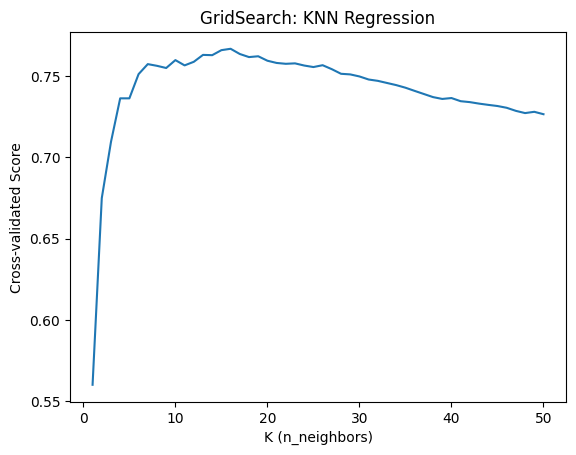

In [20]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
k_values = range(1, 51)
scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    scores.append(knn_scores.mean())

plt.plot(k_values, scores)
plt.xlabel('K (n_neighbors)')
plt.ylabel('Cross-validated Score')
plt.title('GridSearch: KNN Regression')
plt.show()

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [23]:
# YOUR CODE HERE
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]}
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]})

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [28]:
# YOUR CODE HERE
n_submodels = grid_search.n_splits_ * len(grid_search.cv_results_['params'])
n_submodels

75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [32]:
# YOUR CODE HERE
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params,best_score


({'n_neighbors': 10, 'p': 1}, 0.7969255879201194)

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [40]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
knn = KNeighborsRegressor()
param_dist = {'n_neighbors': randint(1, 50), 'p': [1, 2, 3]}
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=75, cv=5, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
best_model = random_search.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=9, p=1)

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [47]:
# YOUR CODE HERE

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
best_model = random_search.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=2, p=1)

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [41]:
# YOUR CODE HERE
cv_results_df = pd.DataFrame(random_search.cv_results_)
print(cv_results_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.000744      0.000100         0.086949        0.004107   
1        0.001804      0.000452         0.006970        0.000709   
2        0.001069      0.000313         0.008137        0.003353   
3        0.002046      0.001223         0.004048        0.000627   
4        0.001674      0.000893         0.005038        0.001790   
..            ...           ...              ...             ...   
70       0.000593      0.000155         0.002319        0.000337   
71       0.000599      0.000073         0.002726        0.000076   
72       0.000644      0.000056         0.005454        0.000114   
73       0.000963      0.000493         0.002936        0.000869   
74       0.001035      0.000703         0.006350        0.000056   

   param_n_neighbors param_p                       params  split0_test_score  \
0                 40       3  {'n_neighbors': 40, 'p': 3}           0.703138   
1                  1   

❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [50]:
# YOUR CODE HERE
from sklearn.metrics import r2_score
y_pred = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
r2_test

0.7457443037913776

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [44]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-workflow/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!